# 项目：TMDB数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 在本报告中，对TMDB的数据进行探索和分析，尝试解决的问题有：1.年份和投票得分的关系；2.票房和其他属性是否相关；3.导演和票房的关系

In [1]:
#   导入语句。
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：对数据进行清理

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 数据信息
- id                      
- imdb_id                 
- popularity              受欢迎程度
* budget                  预算
* revenue                 票房
* original_title          原名
* cast                    卡司
* homepage                网站
* director                导演
* tagline                 宣传词
* keywords                关键词
* overview                简介
* runtime                 时长
* genres                  类型
* production_companies    公司
* release_date            上映时间
* vote_count              投票数
* vote_average            投票平均分
* release_year            上映年
* budget_adj              
* revenue_adj             

## 清理数据
### 1.删除掉不需要的列：budget_adj, revenue_adj, homepage, tagline, overview

In [4]:
df.drop(['budget_adj','imdb_id','revenue_adj','homepage','tagline','overview'],axis=1, inplace=True)

In [5]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

### 2.是否有空值

In [6]:
# 检查空值
df.isnull().any(1).sum()

2199

In [7]:
# 有空值的字段
df.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
director                 True
keywords                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [8]:
# 删除掉所有的genres为空的记录
df.drop(df[df.genres.isnull()].index).head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [9]:
### 其他的所有的空值来源都是文字列，因此用""代替NAN
df.fillna(value="",inplace=True)

In [10]:
###检查是否没有空值
df.isnull().any().sum()

0

### 3.去重

In [11]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [12]:
df[df['id'] == 42194]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [13]:
### 去掉这条重复的数据
df.drop_duplicates(inplace=True)

In [14]:
### 确定没有重复数据
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


###  去掉票房为0的电影

In [15]:
df = df.drop(index=df[df.budget==0].index)
df = df.drop(index=df[df.revenue==0].index)

In [16]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


## 修改数据类型

In [17]:
### 查看现有数据类型
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

##### 将release_date设置为datetime
    

In [18]:
df['release_datetime']= pd.to_datetime(df['release_date'])

### 由于release_date中年份没有指定前两位，所以转换后20世纪的电影年份写的都是错的，需要进行处理

In [19]:
df['release_datetime'] = df['release_datetime'].apply(lambda x : x if(x < pd.to_datetime("2020/01/01")) else x - pd.DateOffset(years=100))

<a id='eda'></a>
## 探索性数据分析

## 研究问题 1 年份和投票有没有关系(刚上映的电影popularity非常高，但是过了数年甚至数十年能够仍然保持popularity的老电影评分是否都高)

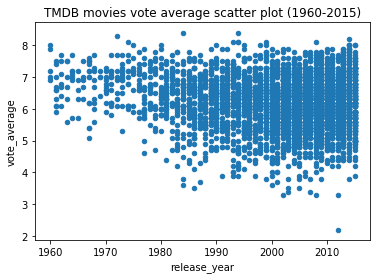

In [20]:
### 做散点图查看每年电影的投票得分
df.plot(kind='scatter',x='release_year',y='vote_average',title='TMDB movies vote average scatter plot (1960-2015)')

### 上图中，可以看到从1960年，投票主要在6分-8分，而逐年开始分散，到2010年左右，投票分布到3分-8分左右，而且电影的数量也越来越多。

Text(0,0.5,'popularity')

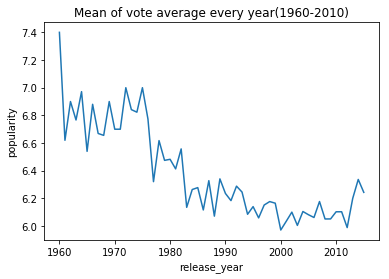

In [21]:
### 做散点图查看每年电影的投票得分
plt = df.groupby('release_year').mean().vote_average.plot(kind='line',title='Mean of vote average every year(1960-2010)')
plt.set_ylabel('popularity') #补充一下y label

### 上图中，可以正式从1960年电影的平均高达7.4分，而后逐渐降低。

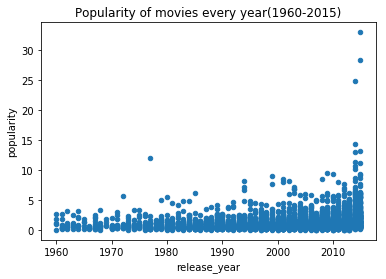

In [34]:
### 查看电影的popularity和年度的关系
df.plot(kind='scatter',x ='release_year',y='popularity',title='Popularity of movies every year(1960-2015)')

### 可见越近的电影，投票得分和受欢迎度跨度越大
### 解决方案：1.将所有评分的中位数为界限，设置颜色；2.选择popularity>1的电影，生成一个df_pop；3.作图检验

In [35]:
# 获得vote得分的中位值
df.vote_average.median()
# df_pop=df[df.popularity>1]
# 直接使用上面的df_pop的方式会报问题A value is trying to be set on a copy of a slice from a DataFrame.
df_pop = df.loc[df[df.popularity>1].index]

In [36]:
df.median()
# 根据投票得分是否高于中位数来赋予颜色
df['vote_color'] = df['vote_average'].apply(lambda x : 'high' if x>df.vote_average.median() else 'low')

In [37]:
df.query('vote_color=="high"').shape

(1810, 17)

In [38]:
df.query('vote_color=="low"').shape

(2044, 17)

In [39]:
df_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1524.000000,1524.000000,1.524000e+03,1.524000e+03,1524.000000,1524.000000,1524.000000,1524.000000
mean,51246.217848,2.197611,5.799872e+07,2.054079e+08,112.751969,1089.837270,6.440223,2003.542651
std,80715.845179,1.933462,5.284277e+07,2.361673e+08,20.476501,1154.539823,0.754946,10.889049
min,5.000000,1.000194,2.100000e+01,4.200000e+01,63.000000,10.000000,3.700000,1960.000000
25%,1734.750000,1.230379,2.000000e+07,5.894727e+07,98.000000,376.750000,5.900000,1999.000000
50%,10084.000000,1.616458,4.000000e+07,1.312332e+08,109.000000,702.000000,6.400000,2007.000000
75%,62351.500000,2.466204,8.000000e+07,2.594294e+08,124.000000,1333.000000,7.000000,2012.000000
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.400000,2015.000000


Text(0,0.5,'vote_average')

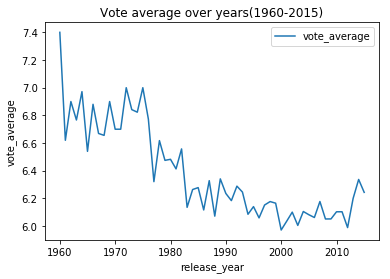

In [86]:
# 画出每年电影的平均vote_average的走线图
ax = df.groupby('release_year').mean().plot(y='vote_average',title='Vote average over years(1960-2015)')
ax.set_ylabel('vote_average')

### 每年电影的平均投票得分总体是波动中下降的

Text(0,0.5,'popularity')

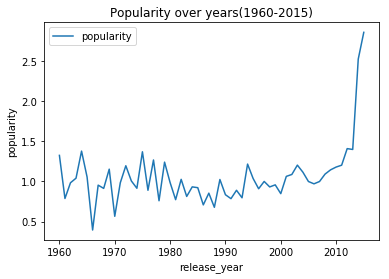

In [87]:
# 画出每年上榜电影的平均popularity的走线图
ax = df.groupby('release_year').mean().plot(y='popularity',title='Popularity over years(1960-2015)')
ax.set_ylabel('popularity')

### 每年的电影的流行度是波动中上升的

In [88]:
# 根据投票得分是否高于中位数来赋予颜色
df_pop['vote_color'] = df_pop['vote_average'].apply(lambda x : 'high' if x>df_pop.vote_average.median() else 'low')

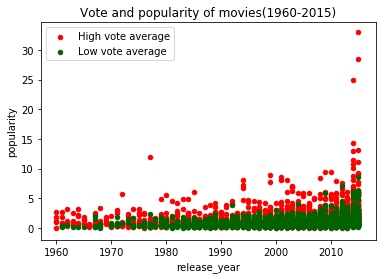

In [89]:
ax = df.query('vote_color=="high"').plot.scatter(x='release_year', y='popularity', color='Red', label='High vote average',title='Vote and popularity of movies(1960-2015)');
# 根据投票得分是否高于中位数来赋予颜色
df.query('vote_color=="low"').plot.scatter(x='release_year', y='popularity', color='DarkGreen', label='Low vote average', ax=ax);

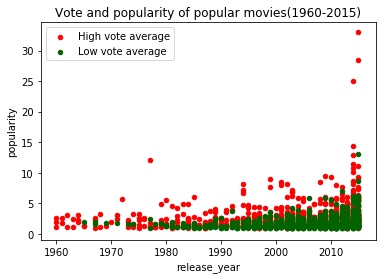

In [90]:
# 查看所有流行度大于1的电影的评分分布情况
ax = df_pop.query('vote_color=="high"').plot.scatter(x='release_year', y='popularity', color='Red', label='High vote average',title='Vote and popularity of popular movies(1960-2015)');
# 根据投票得分是否高于中位数来赋予颜色
df_pop.query('vote_color=="low"').plot.scatter(x='release_year', y='popularity', color='DarkGreen', label='Low vote average', ax=ax);

### 上面四张图显示了电影的popularity和vote得分之间有一定的关系
- 每年的电影的vote_average得分都是有高有低（有红有绿）
- 在同一年的电影中，popularity高的电影的vote得分比较高（红色的点大部分在绿色的点上方）
- popularity比较高的电影里面，越久远的电影vote_average得分都是高的，所以经过时间考验还能保持一定流行度的老电影都是评分比较高的。


### 从图中可以看出，年份越近popularity越高，但是平均投票得分是逐渐降低了

## 研究问题 2 最受欢迎的电影类型是什么

In [78]:
# 先得到一个列表，记录所有的电影类别

## 上一版作业中使用的代码：
#### 因为df中的grenres是字符串，所以要先拆开成一个list
```
genre_list = [x for j in df.genres.apply(lambda x : str(x).split("|")) for x in j]
def list_unique(lists):
   list_u = []
    for item in lists:
        if item not in list_u and item != "":
            list_u.append(item)
    return list_u
len(list_unique(genre_list))
```

**_Review：报告中对genres和director的处理使用for循环的方式，效率比较低。这里其实可以使用pandas中的函数来更高效率地完成：_**


In [79]:
#生成一个genres的series
genres = df['genres'].str.split('|',expand = True).stack().reset_index(level =1 ,drop = True).rename('genres2')

In [80]:
genres.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
Name: genres2, dtype: object

In [81]:
# 合并df和genres
new_df = df.join(genres)
new_df[['genres','genres2','id']].head(5)

,genres,genres2,id
0,Action|Adventure|Science Fiction|Thriller,Action,135397
0,Action|Adventure|Science Fiction|Thriller,Adventure,135397
0,Action|Adventure|Science Fiction|Thriller,Science Fiction,135397
0,Action|Adventure|Science Fiction|Thriller,Thriller,135397
1,Action|Adventure|Science Fiction|Thriller,Action,76341


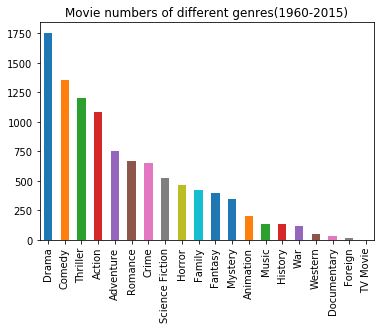

In [91]:
pd.value_counts(new_df['genres2']).plot(kind='bar',title='Movie numbers of different genres(1960-2015)')

#### 在全部影片中，最多的类型是Drama. Comedy,Thriller,Action,Romance

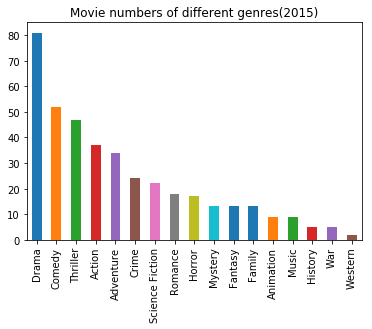

In [92]:
pd.value_counts(new_df.query('release_year==2015')['genres2']).plot(kind='bar',title='Movie numbers of different genres(2015)')

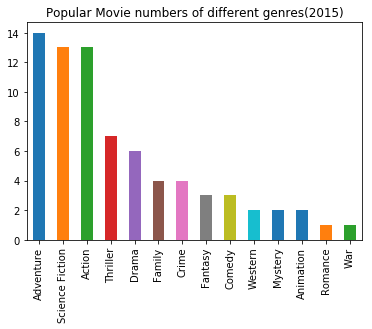

In [93]:
# 查看2015年popularity超过5的电影类型是什么
pd.value_counts(new_df.query('release_year==2015 and popularity>5')['genres2']).plot(kind='bar',title='Popular Movie numbers of different genres(2015)')

#### 2015年最受欢迎的电影是Adventure ,Action ,Science Fiction 和Thriller

#### 在2010年，最受欢迎的影片类型是什么

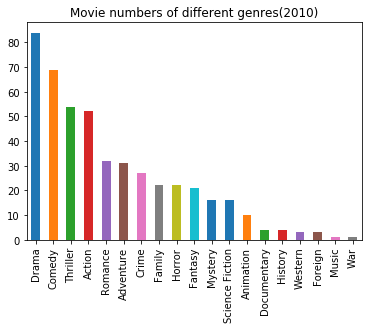

In [95]:
# 查看2010年的电影类型是什么
pd.value_counts(new_df.query('release_year==2010')['genres2']).plot(kind='bar',title='Movie numbers of different genres(2010)')

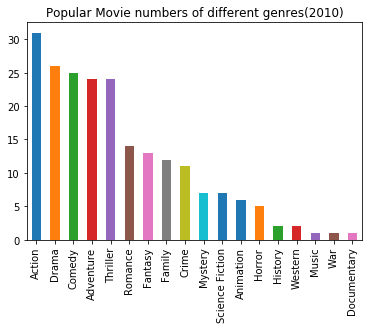

In [96]:
# 查看2010年popularity超过1的电影类型是什么
pd.value_counts(new_df.query('release_year==2010 and popularity>1')['genres2']).plot(kind='bar',title='Popular Movie numbers of different genres(2010)')

### 由上两图对比可见，2010年的电影中，Adventure和Action类型的电影是最受欢迎的。

In [ ]:
years_1990 = ('1990','1991','1992','1993','1994','1995','1996','1997','1998','1999')

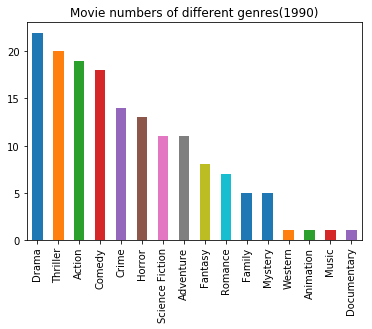

In [97]:
# 查看1990年的电影类型是什么
pd.value_counts(new_df.query('release_year==1990')['genres2']).plot(kind='bar',title='Movie numbers of different genres(1990)')

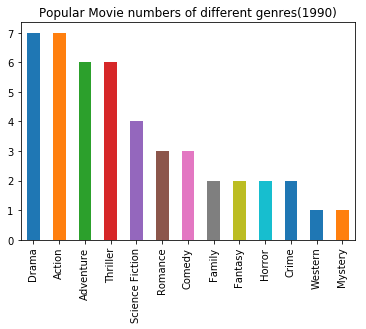

In [98]:
# 查看1990年popularity超过1的电影类型是什么
pd.value_counts(new_df.query('release_year==1990 and popularity>1')['genres2']).plot(kind='bar',title='Popular Movie numbers of different genres(1990)')

### 1990年，最受欢迎的电影是Action和Drama

## 研究问题 3 票房和导演的关系，是否大导演的票房高？

In [99]:
df_2010 = df[df.release_year==2010]
df_2015 = df[df.release_year==2015]

In [100]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'release_datetime', 'vote_color'],
      dtype='object')

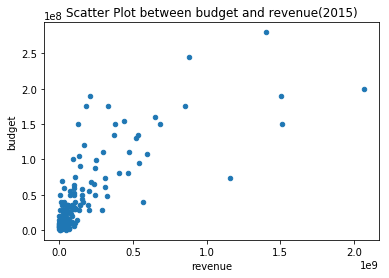

In [103]:
df_2015.plot(kind='scatter', x ='revenue',y='budget',title='Scatter Plot between budget and revenue(2015)')

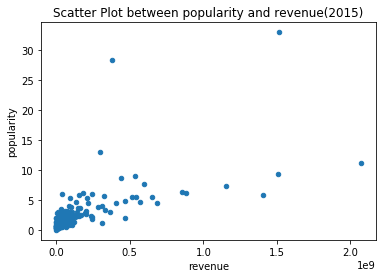

In [104]:
df_2015.plot(kind='scatter', x ='revenue',y='popularity',title='Scatter Plot between popularity and revenue(2015)')

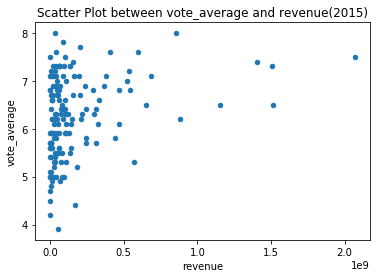

In [106]:
df_2015.plot(kind='scatter', x ='revenue',y='vote_average',title='Scatter Plot between vote_average and revenue(2015)')

### 问题 : 对于 2015 年生产的电影，票房最高的电影是那些

In [111]:
df_2015_high_rev = df_2015[df_2015.revenue > 100000000]

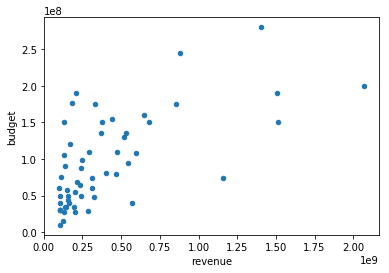

In [112]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='budget')

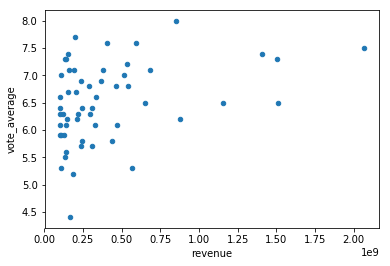

In [113]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='vote_average')

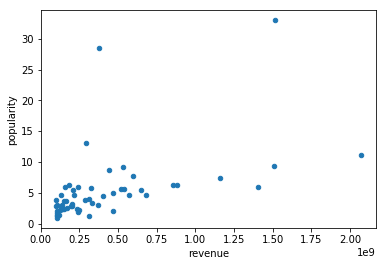

In [114]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='popularity')

### 从上面的散点图发现，票房和budget的关系最大，和popularity正相关，和vote_average相关度最低

### 获得导演列表

In [115]:
directors = df['director'].str.split('|',expand=True).stack().reset_index(level=1, drop=True).rename('director2')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 17 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3854 non-null object
director                3854 non-null object
keywords                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3854 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
release_datetime        3854 non-null datetime64[ns]
vote_color              3854 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(8)
memory usage: 549.5+ KB


In [116]:
# 统计出现次数最多的导演
# director_list = pd.value_counts([x for j in df.director.apply(lambda x : x.split("|")) for x in j])

In [117]:
director_df = df.join(directors)
director_df[['director','director2','id']].head(5)

,director,director2,id
0,Colin Trevorrow,Colin Trevorrow,135397
1,George Miller,George Miller,76341
2,Robert Schwentke,Robert Schwentke,262500
3,J.J. Abrams,J.J. Abrams,140607
4,James Wan,James Wan,168259


In [118]:
director_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_datetime,vote_color,director2
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,2015-06-09,high,Colin Trevorrow
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2015-05-13,high,George Miller


In [119]:
director_no = director_df['director2'].value_counts() >= 10 

In [120]:
director_no[director_no==True].index

Index(['Steven Spielberg', 'Clint Eastwood', 'Ridley Scott', 'Woody Allen',
       'Robert Rodriguez', 'Tim Burton', 'Steven Soderbergh',
       'Martin Scorsese', 'Oliver Stone', 'Brian De Palma', 'Renny Harlin',
       'Robert Zemeckis', 'Tony Scott', 'Wes Craven', 'Ron Howard',
       'Joel Schumacher', 'Richard Donner', 'Peter Farrelly',
       'Francis Ford Coppola', 'Walter Hill', 'Joel Coen', 'John Carpenter',
       'Rob Reiner', 'Barry Levinson', 'Quentin Tarantino', 'Bobby Farrelly',
       'Peter Jackson', 'Kevin Smith', 'Richard Linklater', 'Spike Lee',
       'Michael Bay', 'Brett Ratner', 'John Landis', 'David Fincher',
       'Sam Raimi', 'Ivan Reitman', 'Shawn Levy', 'Paul W.S. Anderson',
       'Michael Mann', 'Rob Cohen', 'David Cronenberg', 'Roman Polanski'],
      dtype='object')

In [121]:
# 求出2010年，大导演的票房情况
df_2010_big = pd.DataFrame(columns=df_2010.columns)
for director in director_no[director_no==True].index:
    #print(director)
    df_2010_tmp = df_2010[df_2010['director'].str.contains(director)==True]
    df_2010_big = pd.concat([df_2010_big,df_2010_tmp],axis=0)
df_2010_big.mean()

id              3.306847e+04
popularity      1.519051e+00
budget          6.158824e+07
revenue         1.845848e+08
runtime         1.109412e+02
vote_count      9.030588e+02
vote_average    6.223529e+00
release_year    2.010000e+03
dtype: float64

In [122]:
df_2010.mean()

id              3.599889e+04
popularity      1.179081e+00
budget          4.754572e+07
revenue         1.224964e+08
runtime         1.067022e+02
vote_count      6.487640e+02
vote_average    6.103371e+00
release_year    2.010000e+03
dtype: float64

### 可见2010年的票房，大导演的平均分高于平均分，但是大导演的电影预算也是较高。

<a id='conclusions'></a>
## 结论

> 本次分析由于对数据的情况不是非常了解，比如票房的随着国家和年代还有很大的变化，所以分析的基础比较浅，并且由于没有考虑到很多因素，分析出来的关系还需深入验证。
 - 1.时间越长的电影还能保持popularity较高的情况下，投票得分都较高
 - 2.所有的电影中类别最多的是DRAMA和COMEDY类型，但是最受欢迎的电影类型随着时间在改变，例如70年代受欢迎的西部片，在后面渐渐不再流行，而在21世纪中受欢迎的类型中科幻和冒险题材比较多，可能是因为高科技手段的原因。
 - 2.电影的受欢迎程度和投票得分关系并不大，而与budget关系比较大
 - 3.产量高的导演们的电影票房较高，预算也高。

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB.ipynb'])

0